In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import os
from PIL import Image, ImageEnhance
import skimage
from skimage import io
from skimage import color
from skimage.filters import threshold_otsu
from skimage.feature import canny
from skimage.transform import rescale

In [2]:
data_dir = 'sample_data/images'
sample_data = os.listdir(data_dir)
sample_data.sort(key=len)
sample_data

['2.jpg', '5.jpg', '6.jpg', '7.jpg', '8.jpg', '9.jpg', '10.jpg']

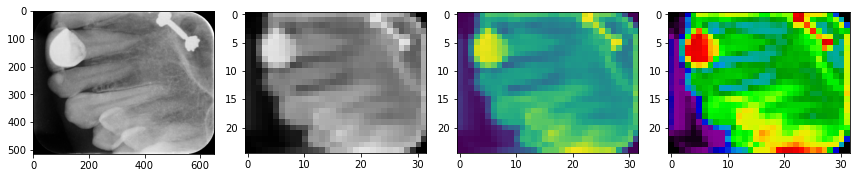

In [3]:
save_dir = 'Processed_Img'

original_img = Image.open(os.path.join(data_dir, sample_data[0]))
original_img_array = np.asarray(original_img)

original_img.thumbnail((32, 32))
resized_img_array = np.asarray(original_img)
io.imsave(os.path.join(save_dir, 'resized_img_array.png'), skimage.img_as_ubyte(resized_img_array))

pseudocolor_img_array = resized_img_array[:, :, 0]
io.imsave(os.path.join(save_dir, 'pseudocolor_img_array.png'), skimage.img_as_ubyte(pseudocolor_img_array))

cmap = plt.cm.nipy_spectral
cmap_img_array = cmap(pseudocolor_img_array)
io.imsave(os.path.join(save_dir, 'cmap_img_array.png'), skimage.img_as_ubyte(cmap_img_array))

fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(12, 12))
ax1.imshow(original_img_array)
ax2.imshow(resized_img_array)
ax3.imshow(pseudocolor_img_array)
ax4.imshow(cmap_img_array)
fig.tight_layout()

In [4]:
print(np.shape(original_img_array))
print(np.shape(resized_img_array))
print(np.shape(pseudocolor_img_array))
print(np.shape(cmap_img_array))

(514, 652, 3)
(25, 32, 3)
(25, 32)
(25, 32, 4)


In [5]:
interpolation = ['none', 'antialiased', 'nearest', 'bilinear', 'bicubic', 'spline16', 
                 'spline36', 'hanning', 'hamming', 'hermite', 'kaiser', 'quadric', 
                 'catrom', 'gaussian', 'bessel', 'mitchell', 'sinc', 'lanczos']

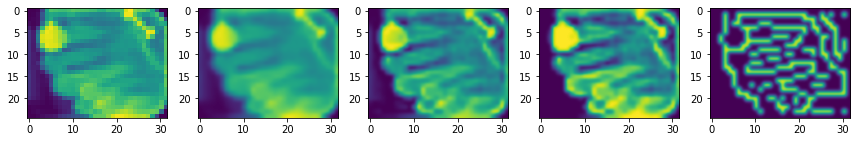

In [6]:
grayscale_resized_img = Image.open(os.path.join(save_dir, 'pseudocolor_img_array.png'))
sharp_enhancer = ImageEnhance.Sharpness(grayscale_resized_img)
sharp_img = sharp_enhancer.enhance(5.0)
contrast_enhancer = ImageEnhance.Contrast(sharp_img)
contrast_img = contrast_enhancer.enhance(1.5)
img_array = np.asarray(contrast_img)
edge_detection = canny(img_array, sigma=1)

fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, figsize=(12,12))
ax1.imshow(grayscale_resized_img)
ax2.imshow(grayscale_resized_img, interpolation=interpolation[-5])
ax3.imshow(sharp_img, interpolation=interpolation[-5])
ax4.imshow(contrast_img, interpolation=interpolation[-5])
ax5.imshow(edge_detection, interpolation=interpolation[-5])
fig.tight_layout()

In [19]:
img = color.rgb2gray(original_img_array)
img_rescale = rescale(img, 0.5)
print(np.shape(img))
print(np.shape(img_rescale))

(514, 652)
(257, 326)


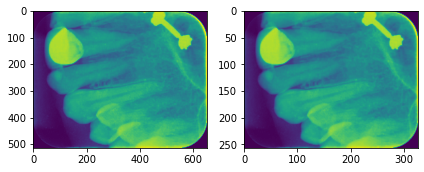

In [23]:
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(img)
ax2.imshow(img_rescale)
fig.tight_layout()